In [3]:
import zipfile

zip_path = "/Users/sahilgulati/Desktop/parkinson-detection-with-voice/data/parkinsons+telemonitoring.zip"  # Replace with your actual path
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("unzipped_dataset")

In [4]:
import os 
import pandas as pd


In [7]:
os.listdir("unzipped_dataset")

['parkinsons_updrs.names', 'parkinsons_updrs.data']

In [5]:
import pandas as pd

df = pd.read_csv("/Users/sahilgulati/Desktop/parkinson-detection-with-voice/notebooks/unzipped_dataset/parkinsons_updrs.data")  # Adjust filename
print(df.head())


   subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0         1   72    0     5.6431       28.199       34.398    0.00662   
1         1   72    0    12.6660       28.447       34.894    0.00300   
2         1   72    0    19.6810       28.695       35.389    0.00481   
3         1   72    0    25.6470       28.905       35.810    0.00528   
4         1   72    0    33.6420       29.187       36.375    0.00335   

   Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
0     0.000034     0.00401      0.00317  ...        0.230       0.01438   
1     0.000017     0.00132      0.00150  ...        0.179       0.00994   
2     0.000025     0.00205      0.00208  ...        0.181       0.00734   
3     0.000027     0.00191      0.00264  ...        0.327       0.01106   
4     0.000020     0.00093      0.00130  ...        0.176       0.00679   

   Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0       0.01309        0.01662      

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

In [7]:
df.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [8]:
# Drop non-voice columns like subject ID, age, gender, test_time
drop_cols = ['subject#', 'age', 'sex', 'test_time']
X = df.drop(columns=drop_cols + ['motor_UPDRS', 'total_UPDRS']) #X will now only include the features that come from voice signals, which are the actual input to your regression model.

y_motor = df['motor_UPDRS']      # for predicting motor symptoms
y_total = df['total_UPDRS']      # for total symptoms


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_motor, test_size = 0.25, random_state=42)


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [11]:
import numpy as np

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


RMSE: 6.59706732059173
R² Score: 0.3270540716772511


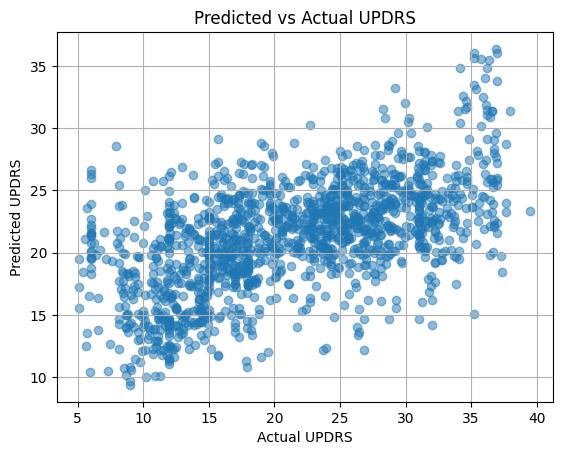

In [12]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual UPDRS")
plt.ylabel("Predicted UPDRS")
plt.title("Predicted vs Actual UPDRS")
plt.grid(True)
plt.show()


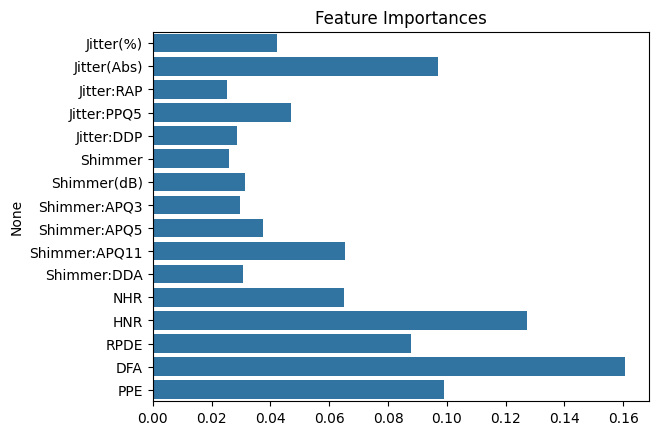

In [13]:
import seaborn as sns

importances = model.feature_importances_
feature_names = X.columns

sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importances")
plt.show()


In [14]:
selected_features = [
    "Jitter(%)", "Jitter(Abs)", "Jitter:RAP", "Jitter:PPQ5", "Jitter:DDP",
    "Shimmer", "Shimmer(dB)", "Shimmer:APQ3", "Shimmer:APQ5", "Shimmer:APQ11", "Shimmer:DDA",
    "NHR", "HNR", "RPDE", "DFA", "PPE"
]


In [16]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

# Prepare data
X = df[selected_features]
y_reg = df["total_UPDRS"]
y_cls = (df["total_UPDRS"] > 20).astype(int)  # Example threshold

# Train/test split
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, test_size=0.2, random_state=42)
_, _, y_cls_train, y_cls_test = train_test_split(X, y_cls, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models
regression_model = RandomForestRegressor()
regression_model.fit(X_train_scaled, y_reg_train)

classifier_model = RandomForestClassifier()
classifier_model.fit(X_train_scaled, y_cls_train)

# Save models
joblib.dump(regression_model, "updrs_regression_model.pkl")
joblib.dump(classifier_model, "parkinsons_classifier_model.pkl")
joblib.dump(scaler, "voice_scaler.pkl")


['voice_scaler.pkl']